Hi Poornima! My name is Alex and I am here to improve your project together! I've added all my comments to new cells with different coloring. 
    
The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. It is a real practice as a Data Analyst work. But if you couldn't handle this task yet, or need additional information, I'll give you a more accurate hint at the next review iteration. Sometimes I could ask to explain some question about the project if I were representative of the business - why some methods were used and what obtained conclusions mean.
    
What do my comments mean?
<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1:</b> I'm using green color for my comment if everything is done successfully.
</div>
<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.1:</b> I'll use yellow color for my comment if I can give you a recommendation or think that something can be improved. This is an optional recommendation but it will be perfect if you work with them.
</div>
<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> I'm using red color for my comment if the block requires some extra work or corrections. The project couldn't be accepted with red comments.
</div>

Please, do not move or delete my comments - it helps us move faster =)
  

To make a dialog let's use this style for your remarks:
<div class="alert alert-info"> <b>Student's comment:</b> Just like this</div>
To make a similar block - double click on the previous row, copy and edit it in places you are changing ;) 

---

## General feedback v.1

Thank you for sending your project. You've done a really good job on it! I like the way you’ve done prepared the data and testing hypotheses in your project. It is excellent that you used the Mann-Whitney test! But also we should explain why we use it. Perhaps in the case of this project, we could use the Student's t-test. There are few things that need to be corrected in your project. They’re mostly minor issues that are easy to fix. I commented on them in the code. 

As a recommendation: it is good when the project has a brief description, brief information about the key steps of the analysis and description of the data (a list of fields and their descriptions), the Table of content. It will make your project even better. Also, it is good, when all code has commented - your future colleagues will appreciate it! It is important because usually, we make data analysis for someone else i.e. your colleagues, boss, or business. The project should be clear to understanding.

Please, give me a chance to improve your skills, read all colored blocks, and send the 2nd version soon ;)

---

## General feedback v.2

Poornima. I'm glad to say that you've done a really good job. Now your project is better! Glad to say that it has been accepted! In the yellow color cells, I left recommendations, that could be useful in future projects.



<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> Poornima, your star with importing libraries is correct! However, we should prepare the project for the business. Your project is an analytical report that someone from the company or your boss will read and study. The project should contain additional information that describes it. 
    
Could you please add the title and short description of the project? You could use the project brief description. You could also provide brief information about the key steps of the analysis and description of the data (a list of fields and their descriptions), of course, if this information exists. Probably it is better to present a short description of the project like as you tell someone about it not only the description from project brief information. For example: "This project investigated the dataset described the behavior of clients' of the telecom operator Megaline who used two prepaid plans - Surf and Ultimate. The main goal of this analyst is the determination which prepaid plan brings in more revenue...". It will make your project even better. 
   
Also, at this stage you could add the Table of content - your future colleagues will appreciate it!
    

</div>

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.2:</b> As I mentioned previously, providing brief information about the key steps of the analysis and description of the data (a list of fields and their descriptions) makes your report better. Also, it is good, when all code has commented - your future colleagues will appreciate it! It is important because usually, we make data analysis for someone else i.e. your colleagues, boss, or business. The project should be clear to understanding. It really could be critical at your future job.
   
Also, at this stage you could add the Table of content - your future colleagues will appreciate it!
    

</div>

## Project Description
- Our work as an analyst for the telecom operator Megalinre. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
- We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Our job is to analyze clients' behavior and determine which prepaid plan brings in more revenue


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1:</b> great that all imports are collected in the first cell!
</div>

In [2]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
mssges = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

In [3]:
[calls.head(),calls.describe()]

[         id  user_id   call_date  duration
 0   1000_93     1000  2018-12-27      8.52
 1  1000_145     1000  2018-12-27     13.66
 2  1000_247     1000  2018-12-27     14.48
 3  1000_309     1000  2018-12-28      5.76
 4  1000_380     1000  2018-12-30      4.22,
              user_id       duration
 count  137735.000000  137735.000000
 mean     1247.658046       6.745927
 std       139.416268       5.839241
 min      1000.000000       0.000000
 25%      1128.000000       1.290000
 50%      1247.000000       5.980000
 75%      1365.000000      10.690000
 max      1499.000000      37.600000]

##### Calls 

- The minimum call duration is 0 mins which refers to a missed call and maximum duration is 37.6 mins.

In [4]:
[internet.head(),internet.describe()]

[         id  user_id session_date  mb_used
 0   1000_13     1000   2018-12-29    89.86
 1  1000_204     1000   2018-12-31     0.00
 2  1000_379     1000   2018-12-28   660.40
 3  1000_413     1000   2018-12-26   270.99
 4  1000_442     1000   2018-12-27   880.22,
              user_id        mb_used
 count  104825.000000  104825.000000
 mean     1242.496361     366.713701
 std       142.053913     277.170542
 min      1000.000000       0.000000
 25%      1122.000000     136.080000
 50%      1236.000000     343.980000
 75%      1367.000000     554.610000
 max      1499.000000    1693.470000]

##### internet
- the minimum data that has been used is 0 mb and maximum is 1693.47 mb

In [5]:
[mssges.head(),mssges.describe()]

[         id  user_id message_date
 0  1000_125     1000   2018-12-27
 1  1000_160     1000   2018-12-31
 2  1000_223     1000   2018-12-31
 3  1000_251     1000   2018-12-27
 4  1000_255     1000   2018-12-26,
             user_id
 count  76051.000000
 mean    1245.972768
 std      139.843635
 min     1000.000000
 25%     1123.000000
 50%     1251.000000
 75%     1362.000000
 max     1497.000000]

- This data is clean

In [6]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- There are two plans surf and ultimate and the corresponing details.

In [7]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.1:</b> I would suggest that it is not necessary to show 100 units within the .head() method in this case. 10 or 5 it is correct.
</div>


In [8]:
[users.head(),users.describe()]

[   user_id first_name  last_name  age                                   city  \
 0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
 1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
 2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
 3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
 4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   
 
      reg_date      plan churn_date  
 0  2018-12-24  ultimate        NaN  
 1  2018-08-13      surf        NaN  
 2  2018-10-21      surf        NaN  
 3  2018-01-28      surf        NaN  
 4  2018-05-23      surf        NaN  ,
            user_id         age
 count   500.000000  500.000000
 mean   1249.500000   45.486000
 std     144.481833   16.972269
 min    1000.000000   18.000000
 25%    1124.750000   30.000000
 50%    1249.500000   46.000000
 75%    1374.250000   61.000000
 max    1499.000000   75.00

##### Users
- The youngest user we have is of 18 years and the oldest one is 75.

In [9]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [10]:
#looking for null values
print('the null values for calls:',calls.isnull().sum())
print('the null values for internet:',internet.isnull().sum())
print('the null values for mssges:',mssges.isnull().sum())
print('the null values for plans:',plans.isnull().sum())
print('the null values for users:',users.isnull().sum())

the null values for calls: id           0
user_id      0
call_date    0
duration     0
dtype: int64
the null values for internet: id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
the null values for mssges: id              0
user_id         0
message_date    0
dtype: int64
the null values for plans: messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
the null values for users: user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


##### As we can see the only null values are in users['churn_date'] 

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.1:</b> Please include comments for code, making it easy to understand which operations are being performed quickly.
</div>


<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> Could you please describe the data? Are there any problems with data excluding null values in  users['churn_date']? What did the .describe() method tell us about data? We also can use the .info() method to estimates the data types and missing values. 
    
It makes your code in Jupyter Notebook even better and useful if used methods, functions and other parts of the code that display some data or tables will be written in separate cells. Also, it is good, when all code has commented - your future colleagues will appreciate it!    
    
</div>

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.2:</b> Using .info() method will help us to find missing data and check wrong datatypes. In this project, we should check the datatype for columns with a date. In the next projects, it could be a critical mistake.
</div>


### Data Preprocessing

In [11]:
calls['user_id'].duplicated().sum()

137254

In [12]:
users['first_name'] = users['first_name'].str.lower()

In [13]:
users['first_name'].duplicated().sum()

42

In [14]:
users['first_name'].head()

0    anamaria
1      mickey
2      carlee
3    reynaldo
4     leonila
Name: first_name, dtype: object

In [15]:
users['user_id'].duplicated().sum()

0

###### As names can be common and they can have duplicate values so its better to use 'user_id' as it is unique

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1:</b> That is correct.
</div>

In [16]:
#Taking month out of the given date
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [17]:
internet['month'].head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [18]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [19]:
mssges['month'] = pd.DatetimeIndex(mssges['message_date']).month

- Extracted month from the each date which was given in data.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1:</b> You introduced extra columns (month) with the help of the pandas dt.month() function perfectly!
</div>

In [20]:
#Grouping the call data
calls_grouped = calls.groupby(
    by = ['user_id','month'])['duration'].sum().to_frame(name = 'duration').reset_index()

In [21]:
calls_grouped.head()

,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [22]:
#Grouping the internet data
internet_grouped = internet.groupby(by = ['user_id','month'])['mb_used'].sum().to_frame(name = 'mb_used').reset_index()

In [23]:
internet_grouped.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> Here's a small issue: according to the telecom operator's rules, the operator rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute, and if one megabyte of data was used, it will be counted as one gigabyte. In this case, we should round the data before making pivot tables. Could you please fix that?
</div>

<div class="alert alert-info"> <b>Student's comment:</b>I have used ceil method in the below cells. </div>

In [24]:
#Grouping the mssges data
mssges_grouped = mssges.groupby(by = ['user_id','month']).agg({'message_date':'count'})

In [25]:
mssges_grouped.head()

message_date
user_id month              
1000    12               11
1001    8                30
        9                44
        10               53
        11               36

In [26]:
#Converting mb to gb
internet['gb_used'] = internet['mb_used']/1024

In [27]:
internet['gb_used'] = internet['gb_used'].apply(np.ceil)

In [28]:
internet['gb_used'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: gb_used, dtype: float64

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1:</b> It's correct that you have used .ceil to round up data!
</div>

- If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.This is the reason to apply np.ceil function.

In [29]:
internet_gb = internet.groupby(by = ['user_id','month'])['gb_used'].sum().to_frame(name = 'gb_used').reset_index()

In [30]:
internet_gb.head()

,user_id,month,gb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0


In [31]:
#calls in hrs
calls['hrs_duration'] = calls['duration']/60

In [32]:
calls_inhrs = calls.groupby(by = ['user_id','month'])['hrs_duration'].sum().to_frame(name = 'hrs_duration').reset_index()

In [33]:
calls_inhrs.head()

,user_id,month,hrs_duration
0,1000,12,1.947167
1,1001,8,2.852333
2,1001,9,4.961500
3,1001,10,6.235167
4,1001,11,6.743167


<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> I would suggest that it is not necessary to convert duration into hours because the operator's tariff plans use minutes. 
</div>

<div class="alert alert-info"> <b>Student's comment:</b>I've added hrs column duration just to get the better idea of the data. Its for my convenience but i had used minutes column wherever needed </div>

In [34]:
#merging the tables
telecom2 = pd.merge(calls_grouped,mssges_grouped,how = 'outer',on = ['user_id','month'])

In [35]:
telecom2.head()

,user_id,month,duration,message_date
0,1000,12,116.83,11.0
1,1001,8,171.14,30.0
2,1001,9,297.69,44.0
3,1001,10,374.11,53.0
4,1001,11,404.59,36.0


In [36]:
telecom2 = pd.merge(telecom2,internet_gb,how = 'outer',on = ['user_id','month'])

In [37]:
telecom2.head()

,user_id,month,duration,message_date,gb_used
0,1000,12,116.83,11.0,4.0
1,1001,8,171.14,30.0,21.0
2,1001,9,297.69,44.0,41.0
3,1001,10,374.11,53.0,50.0
4,1001,11,404.59,36.0,49.0


In [38]:
telecom2 = pd.merge(telecom2,users,how = 'outer',on = 'user_id')

In [39]:
telecom2.head()

,user_id,month,duration,message_date,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,116.83,11.0,4.0,anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,171.14,30.0,21.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,297.69,44.0,41.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10.0,374.11,53.0,50.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11.0,404.59,36.0,49.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


<div class="alert alert-success" role="alert">
<b>Reviewer's comment v.1:</b> The grouped data were merged. 
</div>

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> However, I have a few tiny corrections. The pivot tables were merged using 'right' merge. In the first case of the merging, users that do not use megaline_internet but used calls or messages could be omitted from the final table. Similarly for other cases. Could you please check the merge parameters?
</div>

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> Could you please describe what are you doing next? 
</div>

In [40]:
# Defined a function to find the total revenue for each plan
def total_revenue(row):
    
    #assigning required columns to variables
    plan = row['plan']
    monthly_minutes = row['duration']
    messages = row['message_date']
    internet_usage = row['gb_used']
    
    #separating surf rows 
    if plan == 'surf':
        
        #Calculate revenue for calls (surf plan)
        if monthly_minutes >= 500:
            revenue_calls = (0.03)*(monthly_minutes - 500) 
        else:
            revenue_calls = 0
            
        if messages >= 50:
            revenue_messages = 0.03*(messages - 50)
        else :
            revenue_messages = 0
            
        if internet_usage >= 15:
            revenue_internet_usage = 10*(internet_usage - 15)
        else :
            revenue_internet_usage = 0
 
        cost = 20 + revenue_messages + revenue_internet_usage + revenue_calls
 
 
    #Separate Ultimate rows
    elif plan == 'ultimate':
        
        #calculate revenue for calls (ultimate plan)
        if monthly_minutes >= 3000:
            revenue_calls = (0.01)*(monthly_minutes - 3000) 
        else:
            revenue_calls = 0
            
        if messages >= 1000:
            revenue_messages = 0.01*(messages - 1000)
        else :
            revenue_messages = 0
            
        if internet_usage >= 30:
            revenue_internet_usage = 7*(internet_usage - 30)
        else :
            revenue_internet_usage = 0
 
        cost = 70 + revenue_messages + revenue_internet_usage + revenue_calls
 
    return cost

- Revenue cost according to each plan

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1:</b> Great! The Monthly Revenue was calculated correctly! As some recommendation: it is better to use variables for a calling plan' limits. It will make your code more universal if some information about calling plans changed.
</div>

In [41]:
#final table
telecom2['total_cost'] = telecom2.apply(total_revenue,axis=1)
telecom2.head()

,user_id,month,duration,message_date,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,total_cost
0,1000,12.0,116.83,11.0,4.0,anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70.00
1,1001,8.0,171.14,30.0,21.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,80.00
2,1001,9.0,297.69,44.0,41.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,280.00
3,1001,10.0,374.11,53.0,50.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,370.09
4,1001,11.0,404.59,36.0,49.0,mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,360.00


- Merged table containing data of five tables.

In [42]:
telecom2.isnull().sum()

user_id            0
month             10
duration          45
message_date     497
gb_used           26
first_name         0
last_name          0
age                0
city               0
reg_date           0
plan               0
churn_date      2143
total_cost         0
dtype: int64

In [43]:
#Filling the missing values
telecom2['message_date']=telecom2['message_date'].fillna(0)
telecom2['duration'] = telecom2['duration'].fillna(1)
telecom2['gb_used'] = telecom2['gb_used'].fillna(0.5)

#### Conclusion
- As messages can be zero so we replaced NaN values with zero.
- The minimum duration of any call will be 1 minute, so we replaced NaN values with 1.
- The data which can be used minimum can be 500mb as streaming services and social networking sites also consumes data while surfing, so replaced NaN values with 0.5.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1:</b> Great! The conclusions are correct! As I mentioned previously, please check the merge's method.
</div>

### Analyze the Data

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> Could you please describe what we should do here? 
</div>

- Describing the customers' behavior. Finding the minutes, texts, and volume of data the users of each plan require per month. Calculating the mean, dispersion, and standard deviation. Ploting histograms. Describing the distributions.

In [44]:
call_per_user = calls['duration'].round()

In [45]:
#Mean of the calls duration
calls['duration'].mean()

6.745927033796782

In [46]:
#standard deviation
standard_deviation_calls = np.std(calls['duration'])
print('Standard deviation for calls is:',standard_deviation_calls)

Standard deviation for calls is: 5.839219940164443


In [47]:
#changing the data type
call_per_user.astype(int)

0          9
1         14
2         14
3          6
4          4
          ..
137730     9
137731    11
137732     8
137733     0
137734    14
Name: duration, Length: 137735, dtype: int64

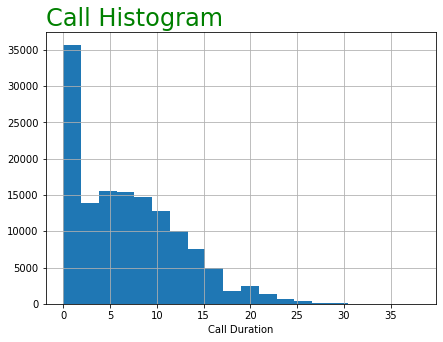

In [48]:
usercalls = call_per_user.hist(bins = 20,grid = True,figsize = (7,5))
usercalls.set_xlabel('Call Duration');
plt.title('Call Histogram',loc = 'left',fontsize=24,color="green" );

- The peak is at zero mins because most of the users prefers talking under 5 mins. There are less users who likes to talk more than 15 mins

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1:</b> Correct.
</div>

In [49]:
text_per_user = mssges_grouped['message_date']

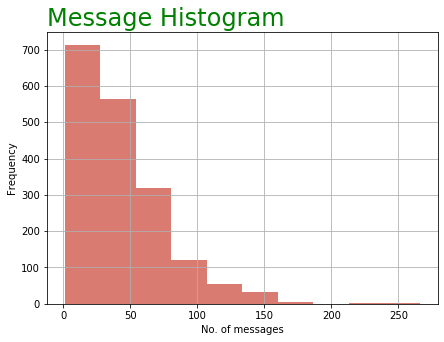

In [50]:
text_hist = text_per_user.plot(kind='hist',grid = True,figsize = (7,5),alpha = 0.7,color = '#CB4335');
text_hist.set_xlabel('No. of messages')
plt.title('Message Histogram',loc = 'left',fontsize=24,color="green" );

- Most of the messages are from 1-50

In [51]:
#mean of text messages
text_per_user.mean()

42.110188261351055

In [52]:
#standard deviation for texts 
standard_deviation_txt = np.std(text_per_user)
print('Standard deviation for texts is:',standard_deviation_txt)

Standard deviation for texts is: 33.11375969500327


<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1:</b> Correct.
</div>

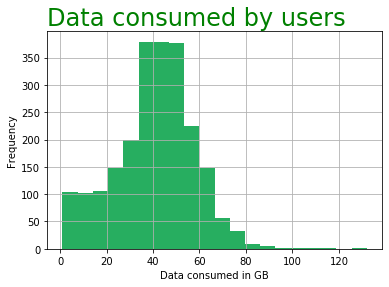

In [53]:
data_hist = internet_gb['gb_used'].plot(kind = 'hist',grid = True,color = '#27AE60',bins = 20);
data_hist.set_xlabel('Data consumed in GB')
plt.title('Data consumed by users',loc = 'left',fontsize=24,color="green" );

- Most of the consumers had used the data between 40 - 60 gb. Data usage is more because nowadays users prefer using internet than any other old school methods.

In [54]:
#Mean of internet used
internet_gb['gb_used'].mean()

40.71980676328502

In [55]:
#Standard deviation for internet
standard_deviation_internet = np.std(internet_gb['gb_used'])
print('Standard deviation for internet is:',standard_deviation_internet)

Standard deviation for internet is: 17.16564314734013


<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1:</b> Correct.
</div>

In [56]:
calls.head()

,id,user_id,call_date,duration,month,hrs_duration
0,1000_93,1000,2018-12-27,8.52,12,0.142000
1,1000_145,1000,2018-12-27,13.66,12,0.227667
2,1000_247,1000,2018-12-27,14.48,12,0.241333
3,1000_309,1000,2018-12-28,5.76,12,0.096000
4,1000_380,1000,2018-12-30,4.22,12,0.070333


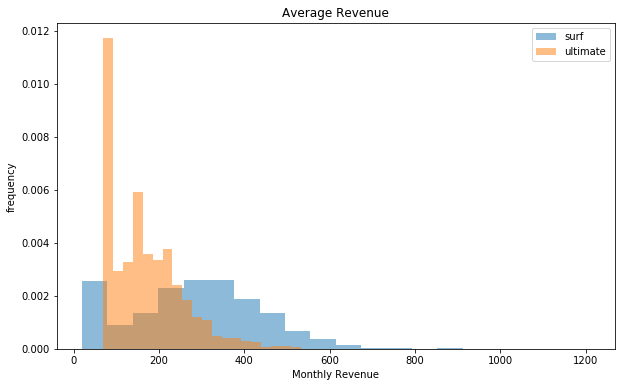

In [57]:
surf_plan = telecom2.query('plan == "surf"')['total_cost']
ultimate_plan = telecom2.query('plan == "ultimate"')['total_cost']
plt.figure(figsize = (10,6))
plt.hist(surf_plan,bins = 20,alpha = 0.5,label = 'surf',density = True)
plt.hist(ultimate_plan,bins = 20,alpha = 0.5,label = 'ultimate',density = True)
plt.xlabel('Monthly Revenue')
plt.ylabel('frequency')
plt.title('Average Revenue')
plt.legend()
plt.show()

###### This is the histogram explaining the average revenue from both the data plans, surf and ultimate. As we can see ultimate has th higher frequency than surf because pricing of ultimate is more than surf. Possible distribution: Normal

Note : 
- Possible distribution was an attempt to guess the distribution. Q-Q plot could be used to test the guess of the distribution (future attempts due to lack of time (; )

<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1:</b> excellent! The graphs have a title, axis descriptions, and legend, good! It would be helpful to vary the bins amount and the scale of the axis. 
    
https://chartio.com/learn/charts/histogram-complete-guide/
    
</div>

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> Could you please describe if there are any outliers?
As some recommendations: we could use a boxplot graph to describe the data and determine outliers. Also, in our case, it is better to determinate lower_whisker limits as 0. This will avoid negative values. I would suggest that we should determine outliers for each calling plan, not for all data.

Also, according to the project description, this step should contain calculating the mean, dispersion, and standard deviation, plotting histograms, and describing the distributions. Could you please add the describing the distributions? I believe you can easily fix it!
    
</div>

In [58]:
#Finding IQR and both lower & upper outlier limit
Q3_dl = telecom2['duration'].quantile(0.75)
Q1_dl = telecom2['duration'].quantile(0.25)
IQR_duration = Q3_dl - Q1_dl
up_duration = Q3_dl + (1.5*IQR_duration)
down_duration = Q1_dl - (1.5*IQR_duration)

In [59]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

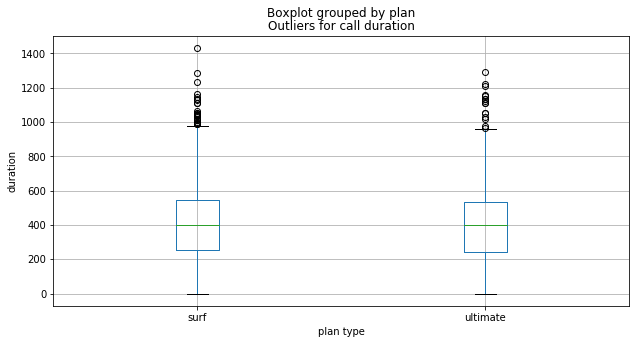

In [60]:
box1 = telecom2.boxplot(column = 'duration',by = 'plan',figsize = (10,5)).set(title='Outliers for call duration', xlabel='plan type', ylabel='duration');


###### For both the plans, most of the calls lasted for a duration less than 1000 minutes

<div class="alert alert-info"> <b>Student's comment:</b>Boxplots were not asked in the project discription </div>

## Test the Hypotheses

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> We should form both null and alternative hypotheses before tests. Could you please fix that?
</div>

###### - Ho = "The average revenue from users of Ultimate and Surf calling plans are not different."
###### - H1 = "The average revenue from users of Ultimate and Surf calling plans are different."

In [61]:
# Wilcoxon-Mann-whitney-Test
from scipy.stats import mannwhitneyu
stat,p = mannwhitneyu(surf_plan,ultimate_plan)
print(('Statistics = %.3f,p = %.5f')% (stat,p))
alpha = 0.05
if p > alpha:
    print('Same distribution')
else:
    print('Different distribution')

Statistics = 316867.500,p = 0.00000
Different distribution


###### Since p-value < alpha, null hypothesis can be rejected. 

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> Could you please explain why you chose the Mann Whitney test for testing hypotheses? It is excellent that you used the Mann-Whitney test! However, here we also could use the Student's t-test because, as you noted, the revenue data somewhat resembles that of normally distributed data as well as we have more than 50 entities for each case. Please, add hypotheses tests using the Student's t-test and describe them.
    
Also, please explanation of the test results here.  
    
</div>

<div class="alert alert-info"> <b>Student's comment:</b>The Data is not normally distributed so its better to use Mann Whitney test </div>

<div class="alert alert-warning" role="alert">
<b>Reviewer's comment v.2:</b> Good. Also, we can use some tests to check the distributions of the data. For example Shapiro–Wilk test. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
</div>


###### the plan data is normally distributed  especially in this assumption, where the distribution is made up of a uniformly distribution cost of the tariff plan and a random value of plan for exceeding the tariff limits with log-normal distribution. So its better to use Mann-whitney test here.

In [62]:
surf_plan.head()

1     80.00
2    280.00
3    370.09
4    360.00
5    420.00
Name: total_cost, dtype: float64

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> We should form both null and alternative hypotheses before tests. Could you please fix that? Also, please add comments to the code.
</div>

In [63]:
ny_region = telecom2.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"').groupby('user_id')['total_cost'].apply(lambda grp : grp.mean())

In [64]:
othr_region = telecom2.query('city != "New York-Newark-Jersey City,NY-NJ-PA MSA"').groupby('user_id')['total_cost']

In [65]:
ny_region = ny_region.astype(int)

In [66]:
othr_region = othr_region.apply(lambda grp: grp.astype(int))

In [67]:
ny_region_smple = ny_region.sample(50)
othr_region_smple = othr_region.sample(50)

###### - Ho = "The average revenue from users in NY-NJ area is not different from that of the users from other regions."
###### - H1 = "The average revenue from users in NY-NJ area is different from that of the users from other regions."

In [68]:
#Wilcoxon-Mannwhitney-Test
from scipy.stats import mannwhitneyu
stat,p = mannwhitneyu(ny_region_smple,othr_region_smple)
print(('Statistics = %.3f,p = %.5f')% (stat,p))
alpha = 0.05
if p > alpha:
    print('Same distribution')
else:
    print('Different distribution')

Statistics = 892.500,p = 0.00692
Different distribution


- Since p-value > alpha, the null hypotheses cannot be rejected

##### From the average revenue histogram we can see that the revenue data is normally distributed  especially in this assumption, where the distribution is made up of a uniformly distributed cost of the tariff plan and a random value of revenue for exceeding the tariff limits with log-normal distribution. So its better to use Mann-whitney test here.

- the ny_region data type was float so for better calculations we converted it to int type
- The ny_region and othr_region both had different counts.
- We took same samples from each dataframe to avoid errors in Mannwhitneyu 
- As p-value is small  means that such an extreme observed outcome would be very unlikely under the null hypothesis
-  For a significance level of 0.05, expect to obtain sample means in the critical region 5% of the time when the null hypothesis is true

<div class="alert alert-danger" role="alert">
<b>Reviewer's comment v.1:</b> As in the case with the first test: could you please explain why you chose the Mann Whitney test for testing hypotheses? Also, please check the conclusions. 
</div>

# Overall Conclusion

- Most of the data from all five tables was clean,there weren't any null values except churn_date which was not useful
- The data was in different tables so we merged the tables to get the data on single dataframe
- Created a function which can provide the revenue cost according to different plan.
- Rounded the internet gb used because If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes
- Conclusion from histograms
  -The peak is at zero mins because most of the users prefers talking under 5 mins. There are less users who likes to talk more than 15 mins
  -Most of the messages are from 1-50
  -Most of the consumers had used the data between 40 - 60 gb
- The histogram explaining the average revenue from both the data plans, surf and ultimate. As we can see ultimate has the higher frequency than surf because pricing of ultimate is more than surf.
-  the revenue data is normally distributed  especially in this assumption, where the distribution is made up of a uniformly distributed cost of the tariff plan and a random value of revenue for exceeding the tariff limits with log-normal distribution. So its better to use Mann-whitney test here
- As p-value is small  means that such an extreme observed outcome would be very unlikely under the null hypothesis
-  For a significance level of 0.05, expect to obtain sample means in the critical region 5% of the time when the null hypothesis is true

##### General Suggestion
- Introducing another plan in between Surf and Ultimate might increase the revenue. 
- Keeping the marketing startegies on Surf plan the same and increasing it for Ultimate plan might help. Some additional offers on Ultimate plan (like extra free data) for soemtime might also help. 


<div class="alert alert-block alert-success">
<b>Reviewer's comment v.1:</b>  Well done that you described the main results of the project. It is great!
</div>


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1:</b> The only wish - make some conclusions interesting for business. It is hard and interesting, I hope you are able to suggest some improvements based on explored data ;)
</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment v.2:</b>  I'm glad to say that you executed your project really well. 
</div>
